# Home Advantage

In [2]:
import pandas as pd
import numpy as np#
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path

In [3]:
filepath = '../../data/prep/Games/Games-950.csv'

In [4]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [5]:
df = df[df.Year != 2018]
df.head()

,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,Sport,...,NOC,NOC_Males_Sent,NOC_Females_Sent,NOC_Total_Sent,NOC_Gold,NOC_Silver,NOC_Bronze,NOC_Total_Medals,NOC_Rating,NOC_Rank
0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,ARG,91.0,0.0,91.0,0,1,1,2,3,27
1,1960,ITA,Rome,True,False,4727,611,5338,Boxing,Boxing,...,ARG,91.0,0.0,91.0,0,1,1,2,3,27
2,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,AUS,165.0,29.0,194.0,9,12,8,29,59,5
3,1960,ITA,Rome,True,False,4727,611,5338,Eventing,Equestrian,...,AUS,165.0,29.0,194.0,9,12,8,29,59,5
4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,AUS,165.0,29.0,194.0,9,12,8,29,59,5


# Sets Figure Settings

In [6]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"+str(fig_size))

Current size:[6.0, 4.0]


In [7]:
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [8]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})

# Working out the deatils of each individual games

In [9]:
games = df.groupby(['Year','Host_City','Summer','Host_Country'])[['Gold','Total_Medals','Ath_Rating']].sum().reset_index(['Summer','Host_Country'])
games.loc[2012].loc['London','Host_Country'] = 'GBR'
games.loc[2004].loc['Athens','Host_Country'] = 'GRE'
games.loc[1984].loc['Sarajevo','Host_Country'] = 'YUG'
games.loc[1972].loc['Munich','Host_Country'] = 'FRG'
games.loc[1964].loc['Innsbruck','Host_Country'] = 'AUT'
games.loc[1976].loc['Innsbruck','Host_Country'] = 'AUT'
games.loc[1980].loc['Moscow','Host_Country'] = 'URS'
games

C:\Users\dmagu\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Summer Host_Country  Gold  Total_Medals  Ath_Rating
Year Host_City                                                          
1960 Rome              True          ITA   176           505        1016
     Squaw Valley     False          USA    25            82         161
1964 Innsbruck        False          AUT    34           101         205
     Tokyo             True          JPN   182           543        1084
1968 Grenoble         False          FRA    40           109         226
     Mexico            True          MEX   203           556        1133
1972 Munich            True          FRG   221           645        1296
     Sapporo          False          JPN    36           106         215
1976 Innsbruck        False          AUT    40           114         231
     Montréal          True          CAN   222           652        1308
1980 Lake Placid      False          USA    41           120         244
     Moscow            True          URS   230           654        1322
1984 Los Angeles       True          USA   241           731        1445
     Sarajevo         False          YUG    41           125         248
1988 Calgary          False          CAN    48           143         287
     Seoul             True          KOR   273           788        1577
1992 Albertville      False          FRA    64           182         372
     Barcelone         True          ESP   282           852        1686
1994 Lillehammer      False          NOR    66           194         394
1996 Atlanta           True          USA   288           867        1724
1998 Nagano           False          JPN    71           202         412
2000 Sydney            True          AUS   316           966        1920
2002 Salt Lake City   False          USA    86           238         486
2004 Athens            True          GRE   329           980        1949
2006 Turin            False          ITA    93           264         535
2008 Beijing           True          CHN   321           987        1939
2010 Vancouver        False          CAN    89           266         537
2012 London            True          GBR   321           997        1950
2014 Sochi            False          RUS   112           314         634
2016 Rio               True          BRA   334          1023        2014

# Adding Country Names

In [10]:
filepath = '../../data/raw/dictionary.csv'

In [11]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    dicdf = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [12]:
dicdf.head(3)

,Country,Code,Region
0,Afghanistan,AFG,West and Central Asia
1,Albania,ALB,Europe
2,Algeria,ALG,North Africa


In [13]:
dicdf.loc[len(dicdf)] = ['British West Indies','BWI','Caribbean Islands']
dicdf.loc[len(dicdf)] = ['United Team of Germany','EUA','Europe']
dicdf.loc[len(dicdf)] = ['East Germany','GDR','Europe']
dicdf.loc[len(dicdf)] = ['West Germany','FRG','Europe']
dicdf.loc[len(dicdf)] = ['Unified Team','EUN','North Asia']
dicdf.loc[len(dicdf)] = ['Czechoslovakia','TCH','Europe']
dicdf.loc[len(dicdf)] = ['Chinese Taipei','TPE','East Asia']
dicdf.loc[len(dicdf)] = ['Soviet Union','URS','North Asia']
dicdf.loc[len(dicdf)] = ['Yugoslavia','YUG','Europe']
dicdf.loc[len(dicdf)] = ['Lebanon','LBN','West and Central Asia']
dicdf.loc[len(dicdf)] = ['Netherlands Antilles','AHO','Caribbean Islands']
dicdf.loc[len(dicdf)] = ['Independent Olympic Participants','IOP',np.nan]
dicdf.loc[len(dicdf)] = ['Independent Olympians','IOA',np.nan]
dicdf.loc[len(dicdf)] = ['Serbia and Montenegro','SCG','Europe']
dicdf.tail()

,Country,Code,Region
208,Lebanon,LBN,West and Central Asia
209,Netherlands Antilles,AHO,Caribbean Islands
210,Independent Olympic Participants,IOP,NaN
211,Independent Olympians,IOA,NaN
212,Serbia and Montenegro,SCG,Europe


In [14]:
dicdf = dicdf.set_index('Code')

In [15]:
df['Country'] = df['NOC'].apply(lambda x: dicdf.loc[x].Country)
df['Region'] = df['NOC'].apply(lambda x: dicdf.loc[x].Region)

# Hosts

In [16]:
hosts = games.reset_index('Year').groupby(['Host_Country'])[['Year']].nunique().reset_index()
hosts['Country'] = hosts.Host_Country.apply(lambda x: df.set_index('NOC').loc[x].reset_index().loc[0].Country)
hosts.head()

,Host_Country,Year,Country
0,AUS,1,Australia
1,AUT,2,Austria
2,BRA,1,Brazil
3,CAN,3,Canada
4,CHN,1,China


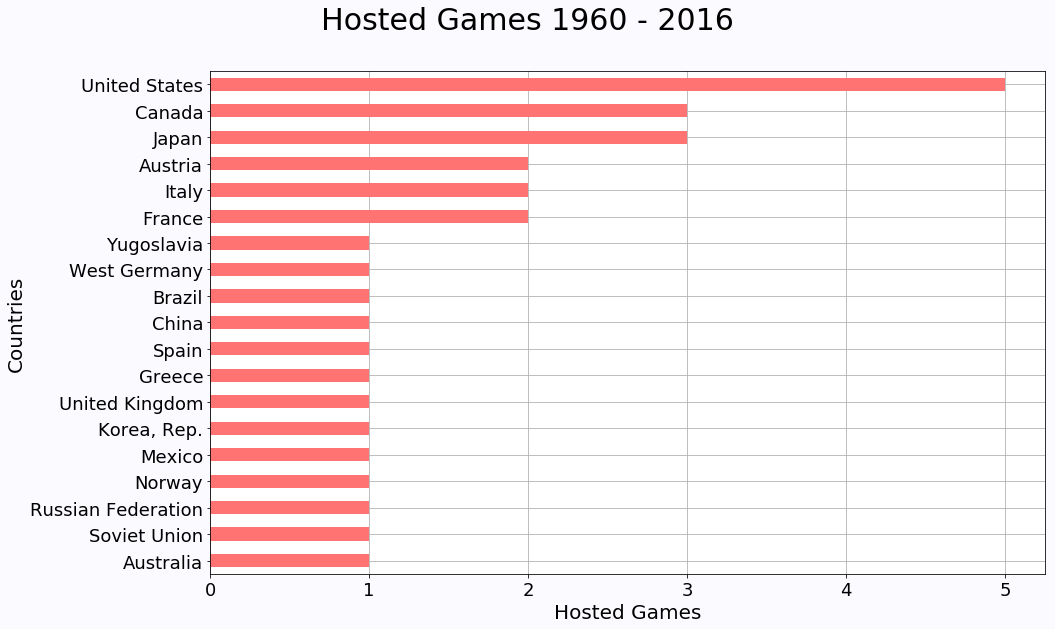

In [17]:
fig, ax = plt.subplots(facecolor='#fafaff')
hosts.set_index('Country').sort_values('Year').Year.plot(kind='barh',ax=ax,color = '#ff7373')
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Countries',fontsize=20)
plt.xlabel('Hosted Games',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Hosted Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/Hosts.png')

# Grouping the athletes together based on their nationality

In [18]:
df = df.groupby(['Country','Year','Host_City','Summer','NOC','Region'])[['Gold', 'Silver', 'Bronze','Total_Medals', 'Ath_Rating']].sum()
df = df.reset_index()
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7


# Creating Columns for Medal, Gold and Rating Share 

In [19]:
df['Gold_Share'] = df.apply(lambda x: x.Gold/games.loc[x.Year].loc[x.Host_City].Gold, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944


In [20]:
df['Medal_Share'] = df.apply(lambda x: x.Total_Medals/games.loc[x.Year].loc[x.Host_City].Total_Medals, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001013
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001003
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546,0.002347
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944,0.003460


In [21]:
df['Rating_Share'] = df.apply(lambda x: x.Ath_Rating/games.loc[x.Year].loc[x.Host_City].Ath_Rating, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001013,0.000516
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001003,0.000513
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736,0.001384
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546,0.002347,0.002372
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944,0.003460,0.004060


In [22]:
df.to_csv('../../data/Final/Country.csv')

In [23]:
fulldf = df

# Removing Countries who have not hosted a Games

In [24]:
countries = games.Host_Country.unique()
df = df[df.NOC.isin(countries)]
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
26,Australia,1960,Rome,True,AUS,Oceania,9,12,8,29,59,0.051136,0.057426,0.058071
27,Australia,1964,Tokyo,True,AUS,Oceania,6,3,14,23,38,0.032967,0.042357,0.035055
28,Australia,1968,Mexico,True,AUS,Oceania,5,8,6,19,37,0.024631,0.034173,0.032657
29,Australia,1972,Munich,True,AUS,Oceania,8,7,2,17,40,0.036199,0.026357,0.030864
30,Australia,1976,Montréal,True,AUS,Oceania,0,1,4,5,6,0.000000,0.007669,0.004587


In [25]:
df.Country.unique()

array(['Australia', 'Austria', 'Brazil', 'Canada', 'China', 'France',
       'Greece', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico', 'Norway',
       'Russian Federation', 'Soviet Union', 'Spain', 'United Kingdom',
       'United States', 'West Germany', 'Yugoslavia'], dtype=object)

# 1960

In [26]:
countries = games.loc[1960].Host_Country.unique()
countries

array(['ITA', 'USA'], dtype=object)

In [27]:
temp = df[df.NOC.isin(countries)]
temp.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
524,Italy,1960,Rome,True,ITA,Europe,15,11,18,44,85,0.085227,0.087129,0.083661
525,Italy,1960,Squaw Valley,False,ITA,Europe,0,0,1,1,1,0.000000,0.012195,0.006211
526,Italy,1964,Innsbruck,False,ITA,Europe,0,1,3,4,5,0.000000,0.039604,0.024390
527,Italy,1964,Tokyo,True,ITA,Europe,11,10,7,28,60,0.060440,0.051565,0.055351
528,Italy,1968,Grenoble,False,ITA,Europe,3,0,0,3,9,0.075000,0.027523,0.039823


In [28]:
years = [1960,1964]
temp = temp[temp.Year.isin(years)]
temp.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
524,Italy,1960,Rome,True,ITA,Europe,15,11,18,44,85,0.085227,0.087129,0.083661
525,Italy,1960,Squaw Valley,False,ITA,Europe,0,0,1,1,1,0.000000,0.012195,0.006211
526,Italy,1964,Innsbruck,False,ITA,Europe,0,1,3,4,5,0.000000,0.039604,0.024390
527,Italy,1964,Tokyo,True,ITA,Europe,11,10,7,28,60,0.060440,0.051565,0.055351
1121,United States,1960,Rome,True,USA,North America,41,19,16,76,177,0.232955,0.150495,0.174213


In [29]:
temp

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
524,Italy,1960,Rome,True,ITA,Europe,15,11,18,44,85,0.085227,0.087129,0.083661
525,Italy,1960,Squaw Valley,False,ITA,Europe,0,0,1,1,1,0.000000,0.012195,0.006211
526,Italy,1964,Innsbruck,False,ITA,Europe,0,1,3,4,5,0.000000,0.039604,0.024390
527,Italy,1964,Tokyo,True,ITA,Europe,11,10,7,28,60,0.060440,0.051565,0.055351
1121,United States,1960,Rome,True,USA,North America,41,19,16,76,177,0.232955,0.150495,0.174213
1122,United States,1960,Squaw Valley,False,USA,North America,2,4,3,9,17,0.080000,0.109756,0.105590
1123,United States,1964,Innsbruck,False,USA,North America,1,2,4,7,11,0.029412,0.069307,0.053659
1124,United States,1964,Tokyo,True,USA,North America,42,26,27,95,205,0.230769,0.174954,0.189114


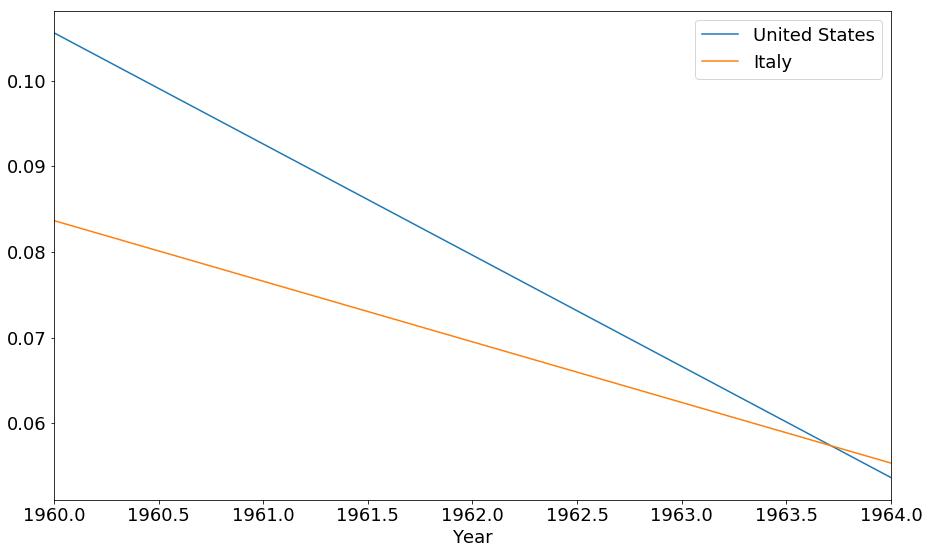

In [30]:
yearDF = pd.concat([temp[temp.Country == 'Italy'][temp[temp.Country == 'Italy'].Summer],temp[temp.Country == 'United States'][~temp[temp.Country == 'United States'].Summer]])
yearDF[yearDF.Country == 'United States'].set_index(['Year']).Rating_Share.plot(label='United States')
yearDF[yearDF.Country == 'Italy'].set_index(['Year']).Rating_Share.plot(label='Italy')
plt.legend()
plt.show()



# General

# For the rest

In [31]:
years = df.Year.unique()
years

array([1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype=int64)

In [32]:
df.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
26,Australia,1960,Rome,True,AUS,Oceania,9,12,8,29,59,0.051136,0.057426,0.058071
27,Australia,1964,Tokyo,True,AUS,Oceania,6,3,14,23,38,0.032967,0.042357,0.035055
28,Australia,1968,Mexico,True,AUS,Oceania,5,8,6,19,37,0.024631,0.034173,0.032657
29,Australia,1972,Munich,True,AUS,Oceania,8,7,2,17,40,0.036199,0.026357,0.030864
30,Australia,1976,Montréal,True,AUS,Oceania,0,1,4,5,6,0.000000,0.007669,0.004587


In [33]:
dfs = []

for i in range(1,len(years)-2):
    if years[i] <= 1992:
        yearFocus = [years[i-1],years[i],years[i+1]]
    
    elif years[i] == 1994:
        yearFocus = [years[i-1],years[i],years[i+2]]
        
    elif years[i] >= 1996:
         yearFocus = [years[i-2],years[i],years[i+2]]
    
    curr = games.reset_index().set_index('Year').loc[years[i]]
    if isinstance(curr.Host_Country, str):
        country = curr.Host_Country
        currA = df[df.NOC == country]
        currA = currA[currA.Year.isin(yearFocus)]
        if years[i] in [1994,1996]:
            if currA.set_index('Year').loc[years[i]].Summer:
                currA = currA[currA.Summer]
            else: 
                currA = currA[~currA.Summer]
        print(country+" completed for - "+str(len(currA))+" years")
        dfs.append(currA)
        
    else:
        for country in curr.Host_Country.unique():
            currA = df[df.NOC == country]
            if years[i] == 1992:
                if games.loc[years[i]].set_index('Host_Country').loc[country].Summer:
                    currA = currA[currA.Summer]
                    yearFocus[2] = 1996
                else:
                    currA = currA[~currA.Summer]
                    yearFocus[2] = 1994
            currA = currA[currA.Year.isin(yearFocus)]
            if games.loc[years[i]].set_index('Host_Country').loc[country].Summer:
                currA = currA[currA.Summer]
            else: 
                currA = currA[~currA.Summer]
            print(country+" completed for - "+str(len(currA))+" years")
            dfs.append(currA)
            
            

AUT completed for - 3 years
JPN completed for - 3 years
FRA completed for - 3 years
MEX completed for - 3 years
FRG completed for - 3 years
JPN completed for - 1 years
AUT completed for - 3 years
CAN completed for - 2 years
USA completed for - 3 years
URS completed for - 2 years
USA completed for - 2 years
YUG completed for - 2 years
CAN completed for - 3 years
KOR completed for - 3 years
FRA completed for - 3 years
ESP completed for - 3 years
NOR completed for - 3 years
USA completed for - 3 years
JPN completed for - 3 years
AUS completed for - 3 years
USA completed for - 3 years
GRE completed for - 3 years
ITA completed for - 3 years
CHN completed for - 3 years
CAN completed for - 3 years
GBR completed for - 3 years


In [34]:
dfList = []
for df in dfs:
    df['norm_Year'] = np.nan
    years = df.Year.unique()
    df = df.set_index('Year')
    if len(df) > 2:
        df.loc[years[0],'norm_Year'] = 'Previous Games'
        df.loc[years[1],'norm_Year'] = 'Hosted Games'
        df.loc[years[2],'norm_Year'] = 'Next Games'
        df = df.reset_index()
        df = df.set_index('norm_Year')
        dfList.append(df)

In [35]:
winter = []
summer = []
for temp in dfList:
    if temp.loc['Previous Games'].Summer:
        summer.append(temp)
    else:
        winter.append(temp)

# Winter

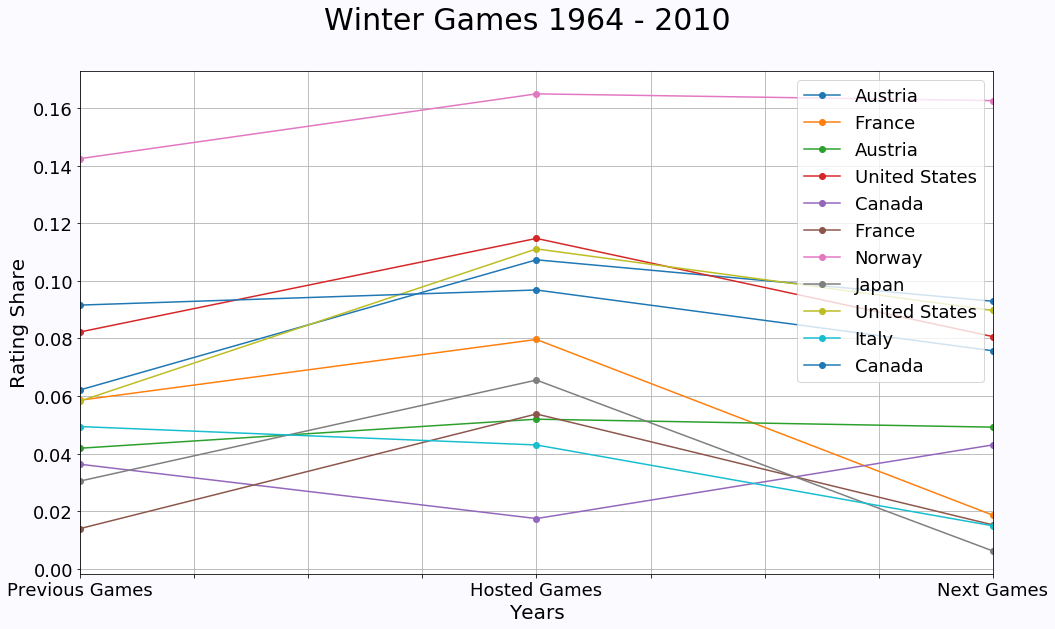

In [36]:
fig, ax = plt.subplots(facecolor='#fafaff')
for i in range(len(winter)):
    winter[i].Rating_Share.plot(label = winter[i].Country.unique()[0], style= '-o')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1964 - 2010', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [37]:
overall = 0
for temp in winter:
    prev = temp.loc['Previous Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Hosted Games'].Year
    improvement = ((hosted-prev)/prev)*100
    overall += improvement
    print(country+" ("+str(year)+") - "+str(improvement)+"%")

ave = overall/len(winter)
print("\n\nAverage imporvement = "+str(ave)+"%")

Austria (1964) - 72.7804878049%
France (1968) - 36.0619469027%
Austria (1976) - 24.0981240981%
United States (1980) - 39.516824849%
Canada (1988) - -51.9938056523%
France (1992) - 285.752688172%
Norway (1994) - 15.7935063691%
Japan (1998) - 115.169902913%
United States (2002) - 90.7407407407%
Italy (2006) - -12.9439252336%
Canada (2010) - 5.72720708395%


Average imporvement = 56.4276089134%


In [38]:
overall = 0
for temp in winter:
    nxt = temp.loc['Next Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Next Games'].Year
    improvement = ((nxt-hosted)/hosted)*100
    overall += improvement
    print(country+" ("+str(year)+") - "+str(improvement)+"%")

ave = overall/len(winter)
print("\n\nAverage imporvement = "+str(ave)+"%")

Austria (1968) - -13.4151246983%
France (1972) - -76.6408268734%
Austria (1980) - -5.32786885246%
United States (1984) - -29.7235023041%
Canada (1992) - 146.88172043%
France (1994) - -71.6751269036%
Norway (1998) - -1.42643764003%
Japan (2002) - -90.580704161%
United States (2006) - -19.2523364486%
Italy (2010) - -65.3469354708%
Canada (2014) - -21.8150934239%


Average imporvement = -22.5747487587%


# Summer

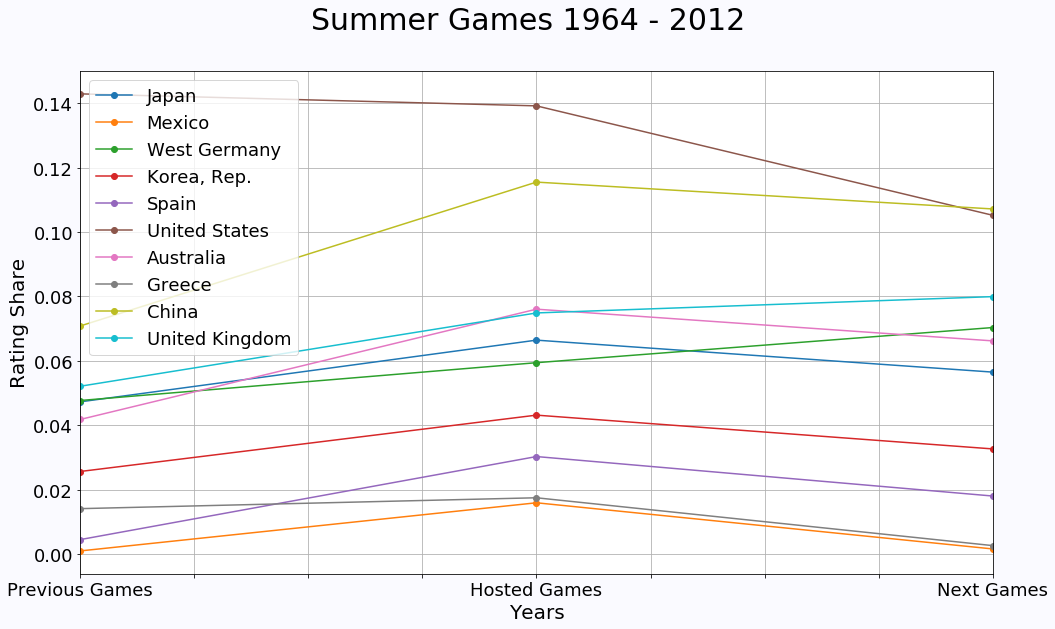

In [39]:
fig, ax = plt.subplots(facecolor='#fafaff')
for i in range(len(summer)):
    summer[i].Rating_Share.plot(label = summer[i].Country.unique()[0],style='-o')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1964 - 2012', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [40]:
overall = 0
count = 0
for temp in summer:
    prev = temp.loc['Previous Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Hosted Games'].Year
    
    improvement = ((hosted-prev)/prev)*100
    if improvement < 600:
        overall += improvement
        count+=1
    print(country+" ("+str(year)+") - "+str(improvement)+"%")

ave = overall/count
print("\n\nAverage imporvement = "+str(ave)+"%")

Japan (1964) - 40.5904059041%
Mexico (1968) - 1622.15357458%
West Germany (1972) - 24.6584933699%
Korea, Rep. (1988) - 68.4004867264%
Spain (1992) - 581.469242501%
United States (1996) - -2.60996813355%
Australia (2000) - 82.0775462963%
Greece (2004) - 24.0522205119%
China (2008) - 63.1559671428%
United Kingdom (2012) - 43.7390200559%


Average imporvement = 102.837046042%


In [41]:
overall = 0
for temp in summer:
    nxt = temp.loc['Next Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Next Games'].Year
    improvement = ((nxt-hosted)/hosted)*100
    overall += improvement
    print(country+" ("+str(year)+") = "+str(improvement)+"%")

ave = overall/len(summer)
print("\n\nAverage imporvement = "+str(ave)+"%")

Japan (1968) = -14.955379033%
Mexico (1972) = -90.286351166%
West Germany (1976) = 18.3843679257%
Korea, Rep. (1992) = -24.3466959738%
Spain (1996) = -40.5554797325%
United States (2000) = -24.4253472222%
Australia (2004) = -12.9585245683%
Greece (2008) = -85.2182750356%
China (2012) = -7.22275641026%
United Kingdom (2016) = 6.76973514168%


Average imporvement = -27.4814706074%


# Overall

In [42]:
len(dfList)

21

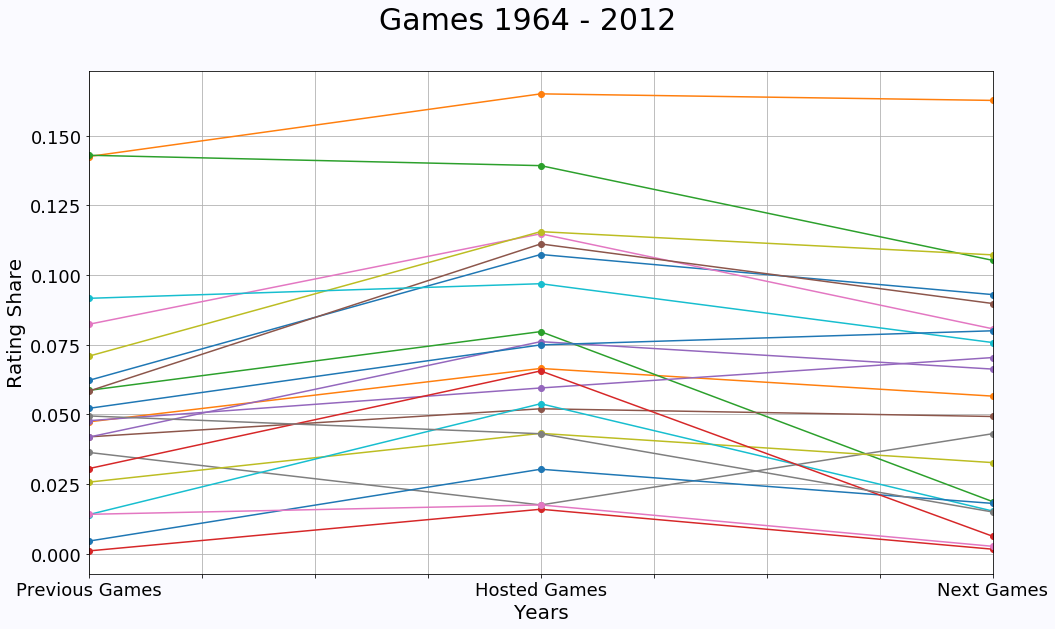

In [43]:
fig, ax = plt.subplots(facecolor='#fafaff')
for i in range(len(dfList)):
    dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o')
plt.grid()
#plt.legend(loc=2,bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 20})
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Games 1964 - 2012', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/OverallHomeAdvatage.png')

# Average Improvement

In [44]:
overall = 0
for temp in dfList:
    prev = temp.loc['Previous Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Hosted Games'].Year
    improvement = ((hosted-prev)/prev)*100
    overall += improvement
    print(country+" ("+str(year)+") = "+str(improvement)+"%")

ave = overall/len(summer)
print("\n\nAverage imporvement = "+str(ave)+"%")

Austria (1964) = 72.7804878049%
Japan (1964) = 40.5904059041%
France (1968) = 36.0619469027%
Mexico (1968) = 1622.15357458%
West Germany (1972) = 24.6584933699%
Austria (1976) = 24.0981240981%
United States (1980) = 39.516824849%
Canada (1988) = -51.9938056523%
Korea, Rep. (1988) = 68.4004867264%
France (1992) = 285.752688172%
Spain (1992) = 581.469242501%
Norway (1994) = 15.7935063691%
United States (1996) = -2.60996813355%
Japan (1998) = 115.169902913%
Australia (2000) = 82.0775462963%
United States (2002) = 90.7407407407%
Greece (2004) = 24.0522205119%
Italy (2006) = -12.9439252336%
China (2008) = 63.1559671428%
Canada (2010) = 5.72720708395%
United Kingdom (2012) = 43.7390200559%


Average imporvement = 316.8390687%


# Dissimporvement next games

In [45]:
overall = 0
for temp in dfList:
    nxt = temp.loc['Next Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Next Games'].Year
    improvement = ((nxt-hosted)/hosted)*100
    overall += improvement
    print(country+" ("+str(year)+") = "+str(improvement)+"%")

ave = overall/len(summer)
print("\n\nAverage imporvement = "+str(ave)+"%")

Austria (1968) = -13.4151246983%
Japan (1968) = -14.955379033%
France (1972) = -76.6408268734%
Mexico (1972) = -90.286351166%
West Germany (1976) = 18.3843679257%
Austria (1980) = -5.32786885246%
United States (1984) = -29.7235023041%
Canada (1992) = 146.88172043%
Korea, Rep. (1992) = -24.3466959738%
France (1994) = -71.6751269036%
Spain (1996) = -40.5554797325%
Norway (1998) = -1.42643764003%
United States (2000) = -24.4253472222%
Japan (2002) = -90.580704161%
Australia (2004) = -12.9585245683%
United States (2006) = -19.2523364486%
Greece (2008) = -85.2182750356%
Italy (2010) = -65.3469354708%
China (2012) = -7.22275641026%
Canada (2014) = -21.8150934239%
United Kingdom (2016) = 6.76973514168%


Average imporvement = -52.313694242%


# Improvement in terms off medal share improvement

In [46]:
overall = 0
for temp in dfList:
    prev = temp.loc['Previous Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Hosted Games'].Year
    improvement = (hosted-prev)
    overall += improvement
    print(country+" ("+str(year)+") = "+str(improvement))

ave = overall/len(summer)
print("\n\nAverage imporvement = "+str(ave))

Austria (1964) = 0.0452052719285
Japan (1964) = 0.0191765697185
France (1968) = 0.0211094323333
Mexico (1968) = 0.0149645163707
West Germany (1972) = 0.0117525034596
Austria (1976) = 0.0100875868318
United States (1980) = 0.0325030161096
Canada (1988) = -0.0188687197932
Korea, Rep. (1988) = 0.0175143114801
France (1992) = 0.0398261586302
Spain (1992) = 0.0258103024573
Norway (1994) = 0.0225015010098
United States (1996) = -0.00373073736765
Japan (1998) = 0.0350771277906
Australia (2000) = 0.0342783255994
United States (2002) = 0.0528586839266
Greece (2004) = 0.00338234350949
Italy (2006) = -0.00639206184378
China (2008) = 0.0447179244007
Canada (2010) = 0.0052454793853
United Kingdom (2012) = 0.0227830893535


Average imporvement = 0.042980262529


# Dissimprovement in terms off medal share improvement

In [48]:
overall = 0
for temp in dfList:
    nxt = temp.loc['Next Games'].Rating_Share
    hosted = temp.loc['Hosted Games'].Rating_Share
    country = temp.loc['Hosted Games'].Country
    year = temp.loc['Next Games'].Year
    improvement = nxt-hosted
    overall += improvement
    print(country+" ("+str(year)+") = "+str(improvement))

ave = overall/len(summer)
print("\n\nAverage imporvement = "+str(ave))

Austria (1968) = -0.0143967191884
Japan (1968) = -0.00993346208837
France (1972) = -0.0610413665363
Mexico (1972) = -0.0143438157192
West Germany (1976) = 0.0109228111904
Austria (1980) = -0.0027677240792
United States (1984) = -0.0341089370703
Canada (1992) = 0.0255891499007
Korea, Rep. (1992) = -0.0104982582512
France (1994) = -0.0385350144643
Spain (1996) = -0.0122676718052
Norway (1998) = -0.00235326006604
United States (2000) = -0.0340028035576
Japan (2002) = -0.0593611410764
Australia (2004) = -0.00985387805712
United States (2006) = -0.0213914849429
Greece (2008) = -0.0148661947215
Italy (2010) = -0.0280930750622
China (2012) = -0.00834397852448
Canada (2014) = -0.0211244852522
United Kingdom (2016) = 0.00506862220864


Average imporvement = -0.0355702687163


# Those that didnt improve
* Canada (1988) - Winter
* United States (1996) - Summer
* Italy (2006) - Winter

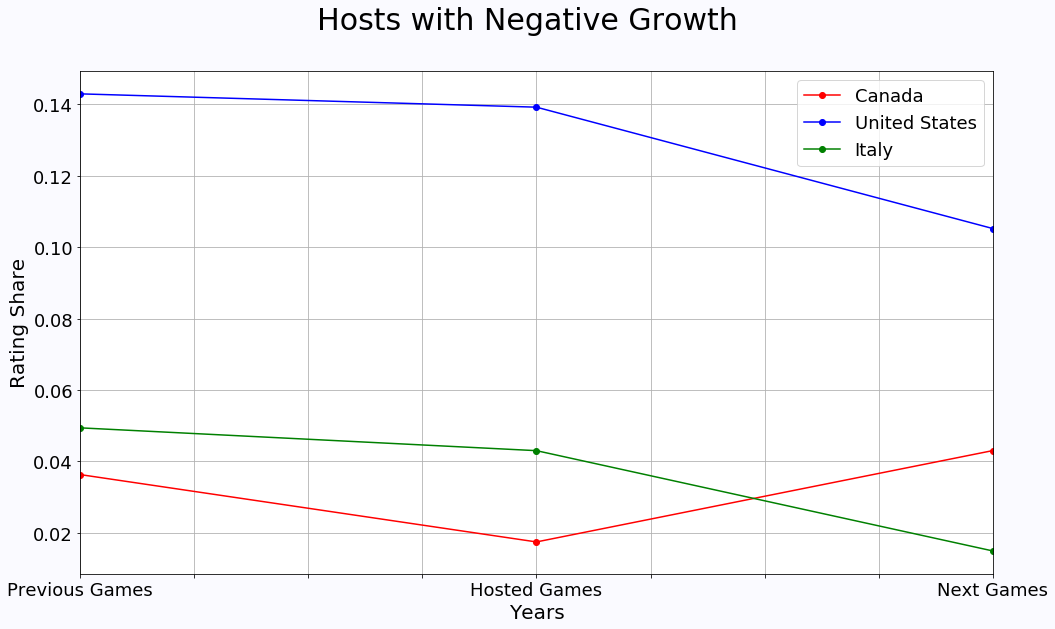

In [343]:
fig, ax = plt.subplots(facecolor='#fafaff')
for i in range(len(dfList)):
    if dfList[i].Country.unique()[0] == 'Canada' and dfList[i].loc['Hosted Games'].Year == 1988:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='red')
    elif dfList[i].Country.unique()[0] == 'United States' and dfList[i].loc['Hosted Games'].Year == 1996:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='blue')
    elif dfList[i].Country.unique()[0] == 'Italy' and dfList[i].loc['Hosted Games'].Year == 2006:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='green')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Hosts with Negative Growth', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/NegativeHomeAdvatage.png')

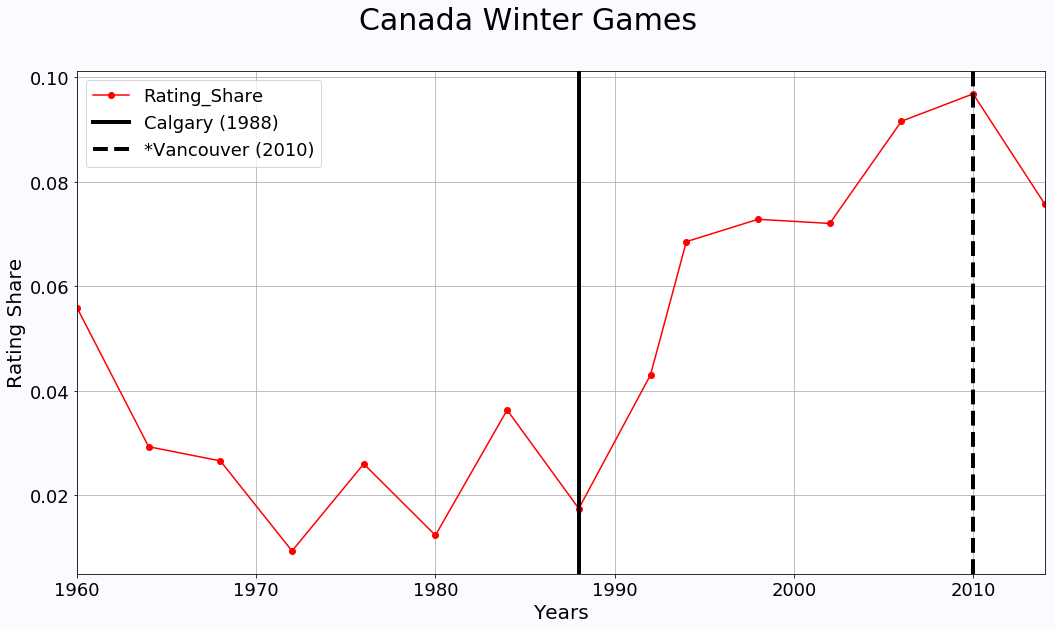

In [371]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Canada'][~fulldf[fulldf.Country == 'Canada'].Summer].set_index('Year')[['Rating_Share']].plot(label='Canada',ax=ax,color='red',style='-o')
plt.axvline(x=1988,color='k',linestyle='-',label='Calgary (1988)',linewidth=4)
plt.axvline(x=2010,color='k',linestyle='--',label='*Vancouver (2010)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Canada Winter Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/NegativeCanHomeAdvatage.png')

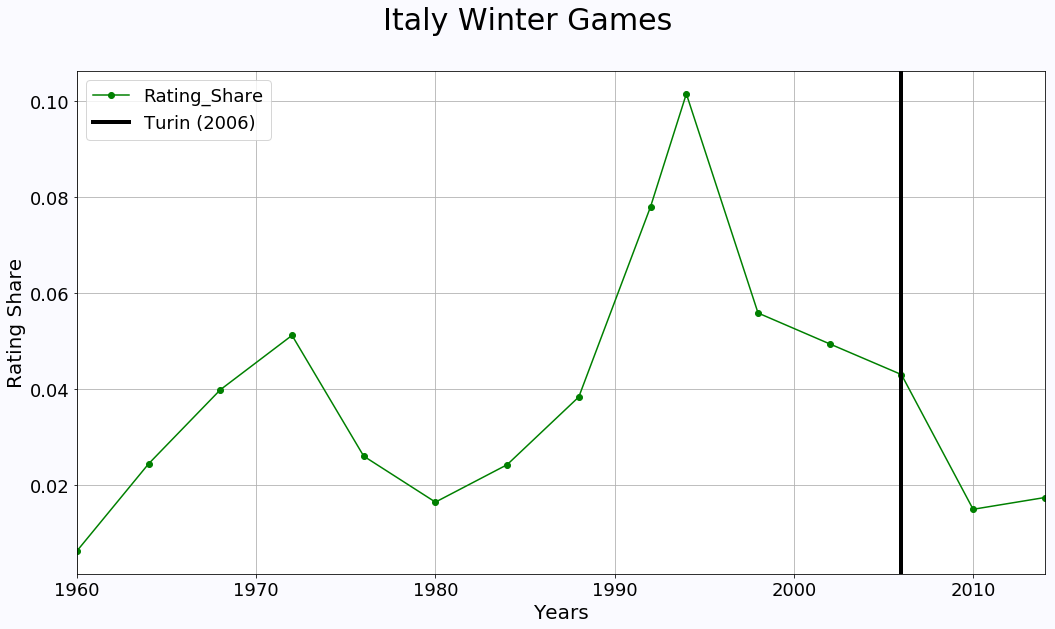

In [271]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Italy'][~fulldf[fulldf.Country == 'Italy'].Summer].set_index('Year')[['Rating_Share']].plot(label='Italy',color='green',ax=ax,style='-o')
plt.axvline(x=2006,color='k',linestyle='-',label='Turin (2006)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Italy Winter Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

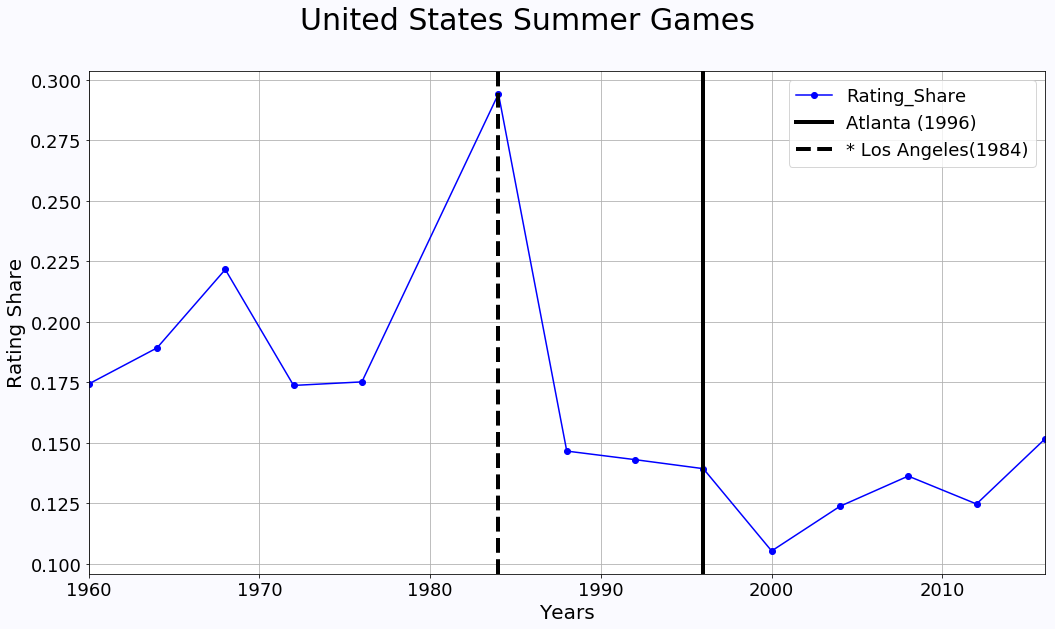

In [265]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'United States'][fulldf[fulldf.Country == 'United States'].Summer].set_index('Year')[['Rating_Share']].plot(label='United States',color='blue',style='-o',ax=ax)
plt.axvline(x=1996,color='k',linestyle='-',label='Atlanta (1996)',linewidth=4)
plt.axvline(x=1984,color='k',linestyle='--',label='* Los Angeles(1984)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('United States Summer Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# Biggest Effect
* Mexico(1968) - Summer
* Farnce (1992) - Winter
* Spain (1992) - Summer

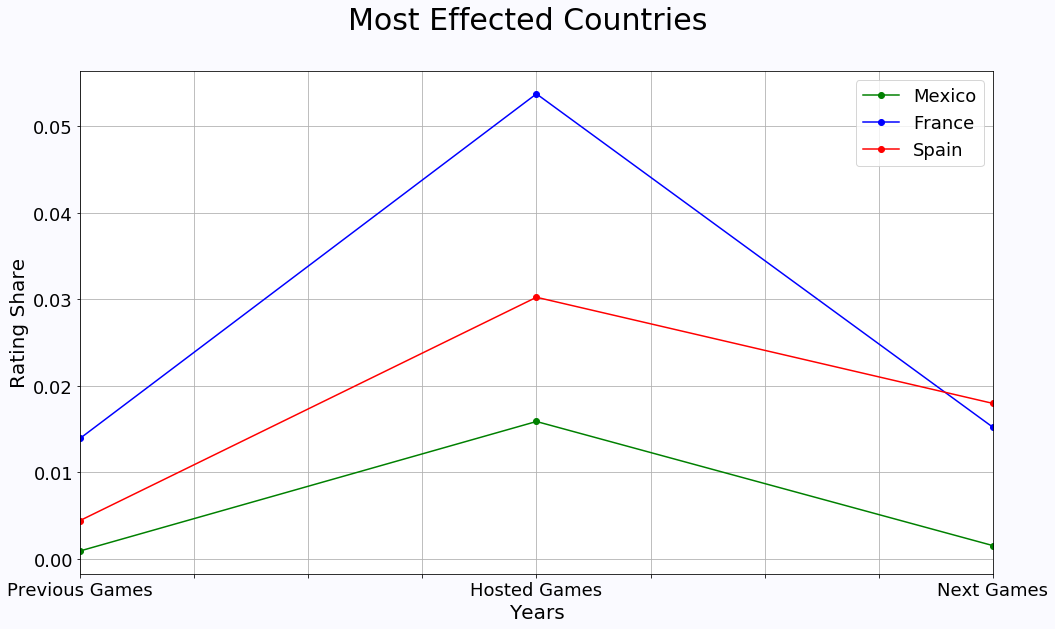

In [353]:
fig, ax = plt.subplots(facecolor='#fafaff')
for i in range(len(dfList)):
    if dfList[i].Country.unique()[0] == 'Mexico' and dfList[i].loc['Hosted Games'].Year == 1968:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='green')
    elif dfList[i].Country.unique()[0] == 'Spain' and dfList[i].loc['Hosted Games'].Year == 1992:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='red')
    elif dfList[i].Country.unique()[0] == 'France' and dfList[i].loc['Hosted Games'].Year == 1992:
        dfList[i].Rating_Share.plot(label = dfList[i].Country.unique()[0],style='-o',color='blue')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Most Effected Countries', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/BiggestHomeAdvatage.png')

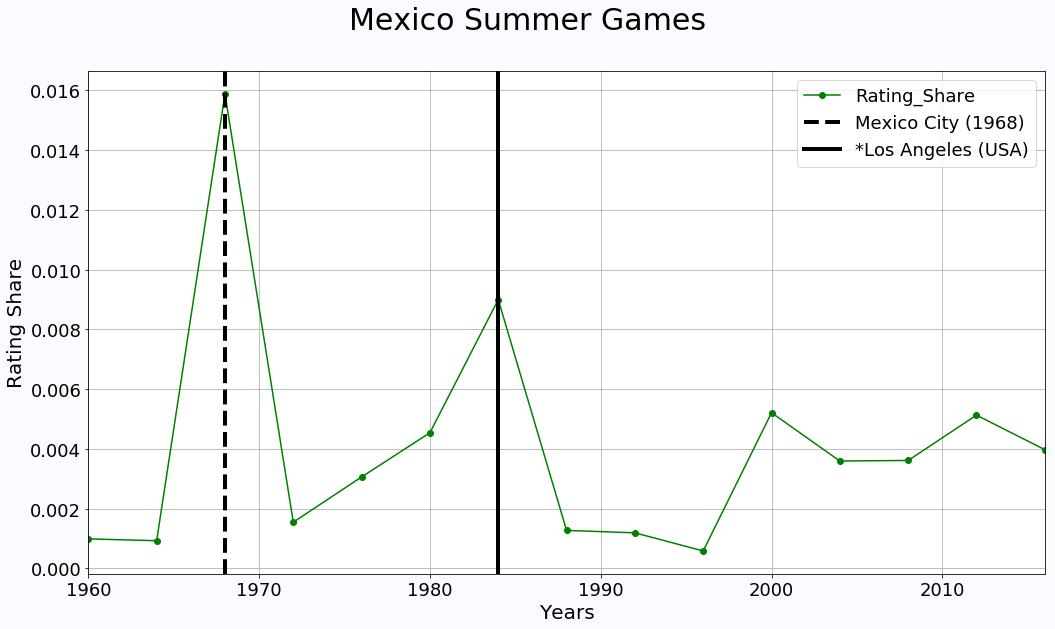

In [253]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Mexico'][fulldf[fulldf.Country == 'Mexico'].Summer].set_index('Year')[['Rating_Share']].plot(label='Mexico',color='green',ax=ax,style='-o')
plt.axvline(x=1968,color='k',linestyle='--',label='Mexico City (1968)',linewidth=4)
plt.axvline(x=1984,color='k',linestyle='-',label='*Los Angeles (USA)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Mexico Summer Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

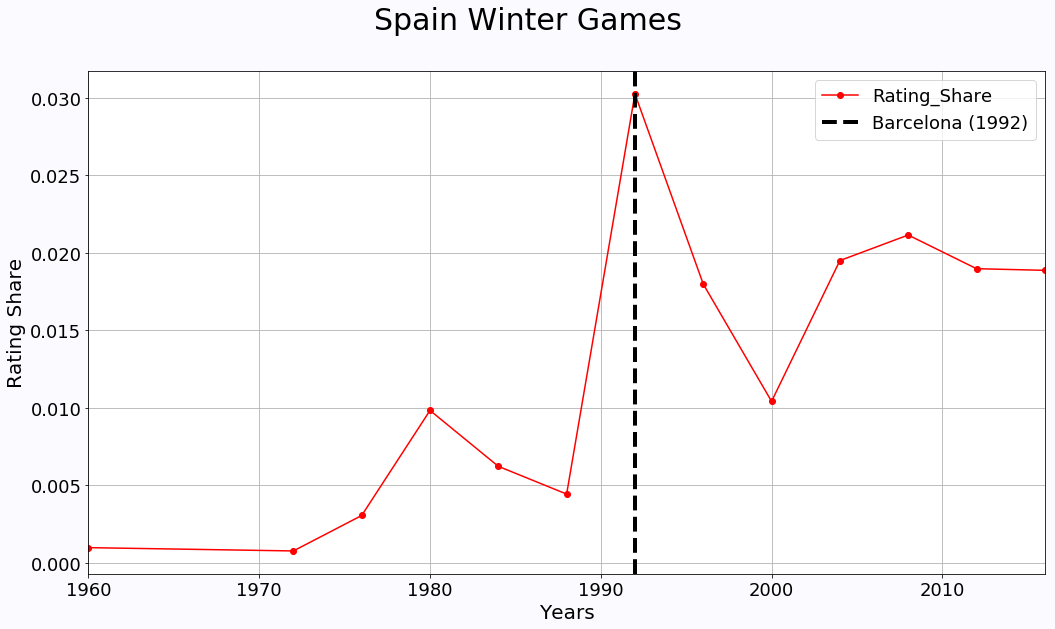

In [355]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Spain'][fulldf[fulldf.Country == 'Spain'].Summer].set_index('Year')[['Rating_Share']].plot(label='Spain',ax=ax,color='red',style='-o')
plt.axvline(x=1992,color='k',linestyle='--',label='Barcelona (1992)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Spain Winter Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

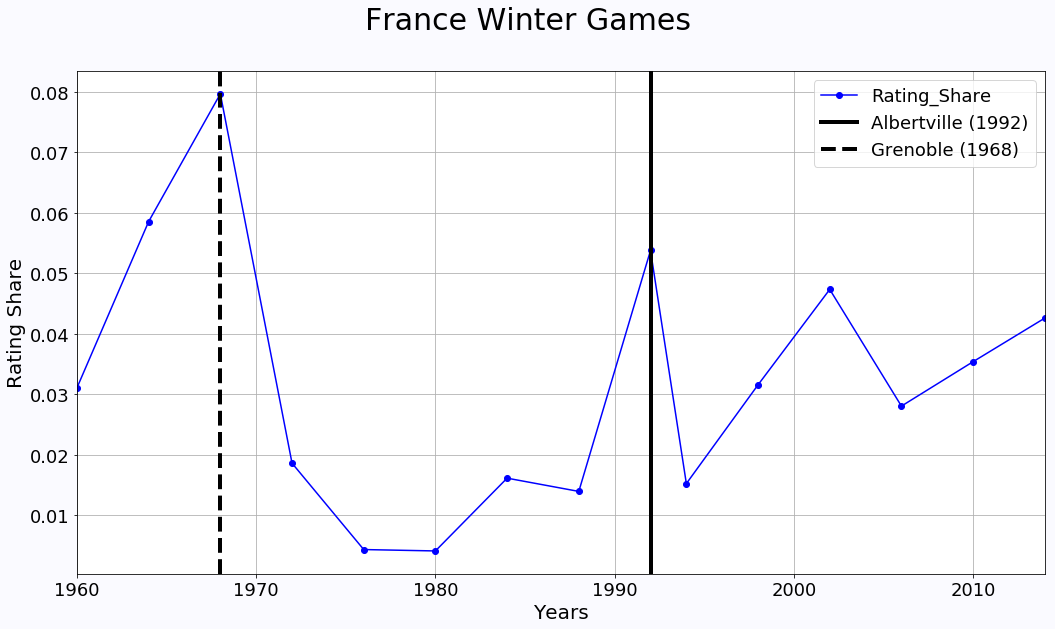

In [362]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'France'][~fulldf[fulldf.Country == 'France'].Summer].set_index('Year')[['Rating_Share']].plot(label='France',ax=ax,color='blue',style='-o')
plt.axvline(x=1992,color='k',linestyle='-',label='Albertville (1992)',linewidth=4)
plt.axvline(x=1968,color='k',linestyle='--',label='Grenoble (1968)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('France Winter Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/FranceHomeAdvatage.png')

# Show the effect of Neighbour Hosting

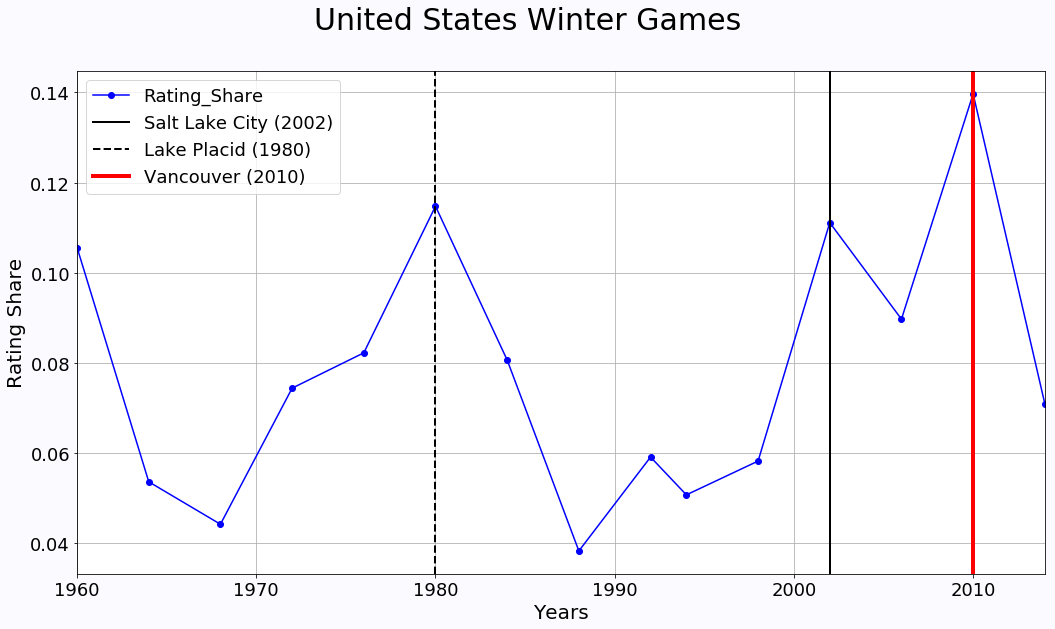

In [351]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'United States'][~fulldf[fulldf.Country == 'United States'].Summer].set_index('Year')[['Rating_Share']].plot(label='United States',ax=ax,color='blue',style='-o')
plt.axvline(x=2002,color='k',linestyle='-',label='Salt Lake City (2002)',linewidth=2)
plt.axvline(x=1980,color='k',linestyle='--',label='Lake Placid (1980)',linewidth=2)
plt.axvline(x=2010,color='r',linestyle='-',label='Vancouver (2010)',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('United States Winter Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/UnitedStatesRedHomeAdvatage.png')

# By Region

In [56]:
fulldf.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,2008,Beijing,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001013,0.000516
1,Afghanistan,2012,London,True,AFG,West and Central Asia,0,0,1,1,1,0.000000,0.001003,0.000513
2,Algeria,1984,Los Angeles,True,ALG,North Africa,0,0,2,2,2,0.000000,0.002736,0.001384
3,Algeria,1992,Barcelone,True,ALG,North Africa,1,0,1,2,4,0.003546,0.002347,0.002372
4,Algeria,1996,Atlanta,True,ALG,North Africa,2,0,1,3,7,0.006944,0.003460,0.004060


In [57]:
#Get NOC codes for countries that have hosted games
nocs = games.Host_Country.unique()

#Get the regions that have hosted games
regions = fulldf[fulldf.NOC.isin(nocs)].Region.unique()

#Only retain the countries that are part of regions that have hosted games
regionDF = fulldf[fulldf.Region.isin(regions)]
regionDF.head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
9,Argentina,1960,Rome,True,ARG,South America,0,1,1,2,3,0.0,0.003960,0.002953
10,Argentina,1964,Tokyo,True,ARG,South America,0,1,0,1,2,0.0,0.001842,0.001845
11,Argentina,1968,Mexico,True,ARG,South America,0,0,2,2,2,0.0,0.003597,0.001765
12,Argentina,1972,Munich,True,ARG,South America,0,1,0,1,2,0.0,0.001550,0.001543
13,Argentina,1988,Seoul,True,ARG,South America,0,1,1,2,3,0.0,0.002538,0.001902


In [58]:
years = regionDF.Year.sort_values().unique()
years

array([1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype=int64)

In [59]:
dfs = []

for i in range(1,len(years)-2):
    if years[i] <= 1992:
        yearFocus = [years[i-1],years[i],years[i+1]]
        
    elif years[i] == 1994:
        yearFocus = [years[i-1],years[i],years[i+2]]
        
    elif years[i] >= 1996:
         yearFocus = [years[i-2],years[i],years[i+2]]
    
    curr = games.reset_index().set_index('Year').loc[years[i]]
    if isinstance(curr.Host_Country, str):
        country = curr.Host_Country
        region = regionDF[regionDF.NOC == country].reset_index().loc[0].Region
        currA = regionDF[regionDF.Region == region]
        currA = currA[currA.Year.isin(yearFocus)]
        if curr.Summer:
            currA = currA[currA.Summer]
        else:
            currA = currA[~currA.Summer]
        print(country+" completed for - "+str(len(currA))+" years")
        dfs.append(currA)
        
    else:
        for country in curr.Host_Country.unique():
            region = regionDF[regionDF.NOC == country].reset_index().loc[0].Region
            currA = regionDF[regionDF.Region == region]
            if years[i] == 1992:
                if games.loc[years[i]].set_index('Host_Country').loc[country].Summer:
                    currA = currA[currA.Summer]
                    yearFocus[2] = 1996
                else:
                    currA = currA[~currA.Summer]
                    yearFocus[2] = 1994
            currA = currA[currA.Year.isin(yearFocus)]
            if games.loc[years[i]].set_index('Host_Country').loc[country].Summer:
                currA = currA[currA.Summer]
            else: 
                currA = currA[~currA.Summer]
            print(country+" completed for - "+str(len(currA.Country.unique()))+" Countries")
            dfs.append(currA)
            
            

AUT completed for - 15 Countries
JPN completed for - 4 Countries
FRA completed for - 16 Countries
MEX completed for - 1 Countries
FRG completed for - 22 Countries
JPN completed for - 1 Countries
AUT completed for - 17 Countries
CAN completed for - 2 Countries
USA completed for - 2 Countries
URS completed for - 1 Countries
USA completed for - 2 Countries
YUG completed for - 16 Countries
CAN completed for - 2 Countries
KOR completed for - 6 Countries
FRA completed for - 18 Countries
ESP completed for - 31 Countries
NOR completed for - 37 years
USA completed for - 6 years
JPN completed for - 9 years
AUS completed for - 7 years
USA completed for - 6 years
GRE completed for - 86 years
ITA completed for - 50 years
CHN completed for - 20 years
CAN completed for - 6 years
GBR completed for - 85 years


Deal with the countries which dont occur before and afte the hosted games

In [60]:
dfs[1].head()

,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
213,Chinese Taipei,1960,Rome,True,TPE,East Asia,0,1,0,1,2,0.000000,0.001980,0.001969
214,Chinese Taipei,1968,Mexico,True,TPE,East Asia,0,0,1,1,1,0.000000,0.001799,0.000883
567,Japan,1960,Rome,True,JPN,East Asia,8,8,8,24,48,0.045455,0.047525,0.047244
568,Japan,1964,Tokyo,True,JPN,East Asia,18,5,8,31,72,0.098901,0.057090,0.066421
569,Japan,1968,Mexico,True,JPN,East Asia,15,6,7,28,64,0.073892,0.050360,0.056487


In [61]:
games.head(20)

Summer Host_Country  Gold  Total_Medals  Ath_Rating
Year Host_City                                                        
1960 Rome            True          ITA   176           505        1016
     Squaw Valley   False          USA    25            82         161
1964 Innsbruck      False          AUT    34           101         205
     Tokyo           True          JPN   182           543        1084
1968 Grenoble       False          FRA    40           109         226
     Mexico          True          MEX   203           556        1133
1972 Munich          True          FRG   221           645        1296
     Sapporo        False          JPN    36           106         215
1976 Innsbruck      False          AUT    40           114         231
     Montréal        True          CAN   222           652        1308
1980 Lake Placid    False          USA    41           120         244
     Moscow          True          URS   230           654        1322
1984 Los Angeles     True          USA   241           731        1445
     Sarajevo       False          YUG    41           125         248
1988 Calgary        False          CAN    48           143         287
     Seoul           True          KOR   273           788        1577
1992 Albertville    False          FRA    64           182         372
     Barcelone       True          ESP   282           852        1686
1994 Lillehammer    False          NOR    66           194         394
1996 Atlanta         True          USA   288           867        1724

In [96]:
dfList = []
for df in dfs:
    years = df.Year.sort_values().unique()
    if len(years) > 2:
        year = years[1]
        city = df[df.Year == year].Host_City.unique()[0]
        df['norm_Year'] = np.nan
        print(str(year)+' - '+city)
        countries = []
        for country in df.Country.unique():
            if len(df[df.Country == country]) == 3:
                countries.append(country)
                print("   - "+country)
        df = df[df.Country.isin(countries)]
        df.loc[df.Year == years[0],'norm_Year'] = 'Previous Games'
        df.loc[df.Year == years[1],'norm_Year'] = 'Hosted Games'
        df.loc[df.Year == years[2],'norm_Year'] = 'Next Games'
        dfList.append(df)
            

1964 - Innsbruck
   - Austria
   - Czechoslovakia
   - Finland
   - France
   - Italy
   - Netherlands
   - Norway
   - Sweden
1964 - Tokyo
   - Japan


C:\Users\dmagu\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1968 - Grenoble
   - Austria
   - Czechoslovakia
   - Finland
   - France
   - Italy
   - Netherlands
   - Norway
   - Sweden
1968 - Mexico
   - Mexico
1972 - Munich
   - Austria
   - Belgium
   - Bulgaria
   - Czechoslovakia
   - Denmark
   - East Germany
   - Finland
   - France
   - Hungary
   - Italy
   - Netherlands
   - Norway
   - Poland
   - Romania
   - Sweden
   - Switzerland
   - United Kingdom
   - West Germany
   - Yugoslavia
1976 - Innsbruck
   - Austria
   - Czechoslovakia
   - East Germany
   - Finland
   - France
   - Italy
   - Netherlands
   - Norway
   - Sweden
   - Switzerland
   - West Germany
1980 - Lake Placid
   - Canada
   - United States
1984 - Sarajevo
   - Austria
   - Czechoslovakia
   - East Germany
   - Finland
   - France
   - Italy
   - Liechtenstein
   - Norway
   - Sweden
   - Switzerland
   - West Germany
1988 - Calgary
   - Canada
   - United States
1988 - Seoul
   - China
   - Japan
   - Korea, Rep.
1992 - Albertville
   - Austria
   - Finland
   

## Check Growth Leading Up to the Hosted Olympics

In [125]:
total = 0
count= 0
for df in dfList:
    if len(df.Country.unique()) > 1:
        year = df.Year.sort_values().unique()[1]
        city = df[df.Year == year].Host_City.unique()[0]
        print(str(year)+" - "+city)
        overall = 0
        for country in df.Country.unique():
            temp = df[df.Country == country].set_index('norm_Year')
            prev = temp.loc['Previous Games'].Rating_Share
            hosted = temp.loc['Hosted Games'].Rating_Share
            improvement = ((hosted-prev)/prev)*100
            overall += improvement
            total += overall
            count+= len(df.Country.unique())
            print("   - "+country+' = '+str(improvement)+"%")
        print("\nAverage Growth = "+str(overall/len(df.Country.unique()))+"%\n\n")

fin = total/count
print('\n\nOverall Average = '+str(fin)+'%')

1964 - Innsbruck
   - Austria = 72.7804878049%
   - Czechoslovakia = -60.7317073171%
   - Finland = -8.37398373984%
   - France = 88.487804878%
   - Italy = 292.682926829%
   - Netherlands = 30.8943089431%
   - Norway = 24.7345767575%
   - Sweden = -10.9918699187%

Average Growth = 53.6853180297%


1968 - Grenoble
   - Austria = -13.4151246983%
   - Czechoslovakia = 625.663716814%
   - Finland = -56.805731142%
   - France = 36.0619469027%
   - Italy = 63.2743362832%
   - Netherlands = 226.548672566%
   - Norway = 54.5394952475%
   - Sweden = 6.71525247267%

Average Growth = 117.822820556%


1972 - Munich
   - Austria = -41.7181069959%
   - Belgium = 16.5637860082%
   - Bulgaria = 121.128358751%
   - Czechoslovakia = -54.8785344484%
   - Denmark = -84.5724400871%
   - East Germany = 137.290564374%
   - Finland = 63.9178240741%
   - France = -49.386777128%
   - Hungary = -18.6481910151%
   - Italy = 3.61225422954%
   - Netherlands = -34.4328703704%
   - Norway = 57.3611111111%
   - Polan

# Examples

Ireland During London 2012

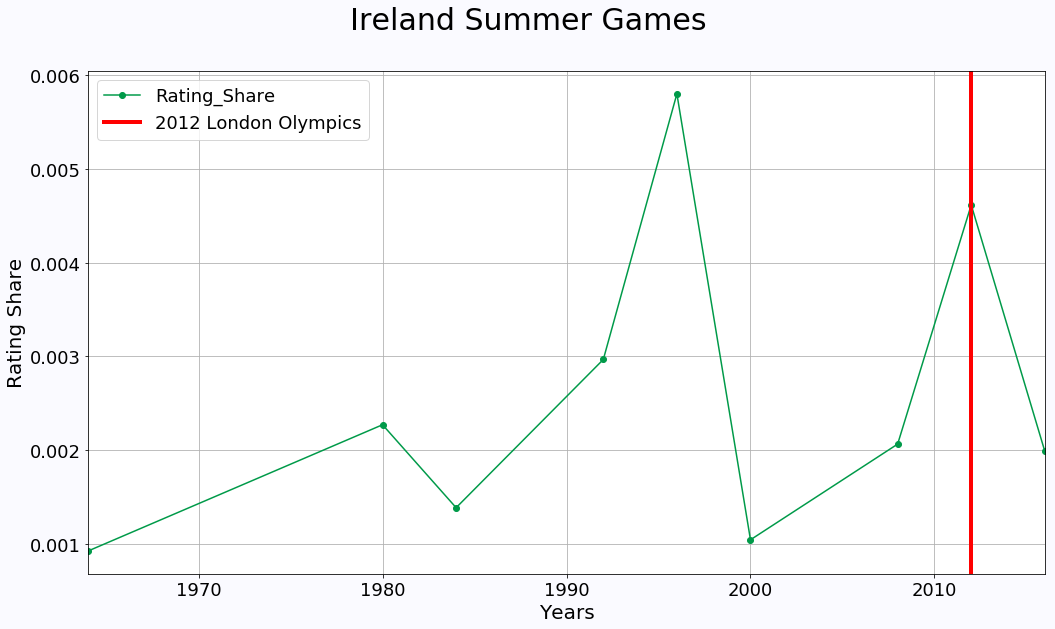

In [350]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Ireland'].set_index('Year')['Rating_Share'].plot(style='-o',color='#009a49')
plt.axvline(x=2012,color='r',linestyle='-',label='2012 London Olympics',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Ireland Summer Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/IrelandRedHomeAdvatage.png')

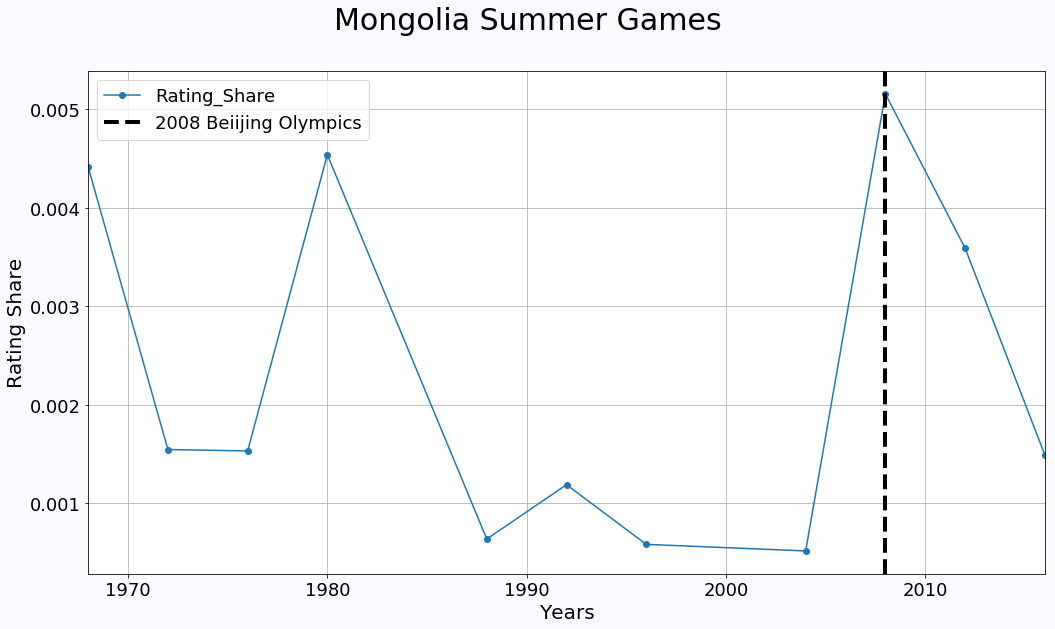

In [240]:
fig, ax = plt.subplots(facecolor='#fafaff')
fulldf[fulldf.Country == 'Mongolia'][fulldf[fulldf.Country == 'Mongolia'].Summer].set_index('Year')['Rating_Share'].plot(style='-o')
plt.axvline(x=2008,color='k',linestyle='--',label='2008 Beiijing Olympics',linewidth=4)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Mongolia Summer Games', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [139]:
fulldf[fulldf.Country == 'Mongolia'][fulldf[fulldf.Country == 'Mongolia'].Summer]


,Country,Year,Host_City,Summer,NOC,Region,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
701,Mongolia,1968,Mexico,True,MGL,East Asia,0,1,3,4,5,0.000000,0.007194,0.004413
702,Mongolia,1972,Munich,True,MGL,East Asia,0,1,0,1,2,0.000000,0.001550,0.001543
703,Mongolia,1976,Montréal,True,MGL,East Asia,0,1,0,1,2,0.000000,0.001534,0.001529
704,Mongolia,1980,Moscow,True,MGL,East Asia,0,2,2,4,6,0.000000,0.006116,0.004539
705,Mongolia,1988,Seoul,True,MGL,East Asia,0,0,1,1,1,0.000000,0.001269,0.000634
706,Mongolia,1992,Barcelone,True,MGL,East Asia,0,0,2,2,2,0.000000,0.002347,0.001186
707,Mongolia,1996,Atlanta,True,MGL,East Asia,0,0,1,1,1,0.000000,0.001153,0.000580
708,Mongolia,2004,Athens,True,MGL,East Asia,0,0,1,1,1,0.000000,0.001020,0.000513
709,Mongolia,2008,Beijing,True,MGL,East Asia,2,2,0,4,10,0.006231,0.004053,0.005157
710,Mongolia,2012,London,True,MGL,East Asia,0,2,3,5,7,0.000000,0.005015,0.003590
